# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly CA 2.

Before attempting these examples, please ensure you have read through [Chapter 6 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter6/Chapter6.ipynb) and have completed the Learning Central **Chapter 6 quiz**. 

***

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#  Credible Intervals

## <font color=#30a64d>Question</font>

Professor Dumbledore, studying the extinction of dragons, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dated and found to have the following ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years. 

1. What is the mean and standard deviation of the age of elephant bird eggs based on Dumbledore's data?

2. Write down an analytical expression for the mean of the ages that takes into account both Professor Dumbledore's new data and the previous age estimate from Professor Snape. Estimate the variance in your mean value.

3. Plot and discuss your results including a discussion of your methods.

### Answer

*Your answer here.*

In [33]:
from numpy.core.fromnumeric import mean
ages = np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])
n = len(ages)

data_mean = np.mean(ages)
data_std = np.std(ages)

print(f"From dumbledores data\n\n              mean : {data_mean:.4f}\nstandard deviation : {data_std:.4f}")



From dumbledores data

              mean : 1663.0952
standard deviation : 479.9151


$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Text(0, 0.5, 'PDF')

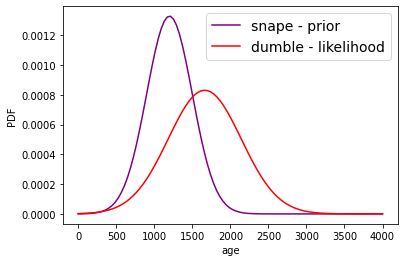

In [34]:
from scipy.stats import norm

prior_mean = 1200
prior_std = 300

d = np.linspace(0,4000,100)

plt.plot(d,norm.pdf(d,prior_mean,prior_std),label='snape - prior',c='purple') #likelihood
plt.plot(d,norm.pdf(d,data_mean,data_std),label='dumble - likelihood',c='red') # prior distribution

plt.legend(loc='best',fontsize=14)

plt.xlabel('age')
plt.ylabel('PDF')

$ \hat{\theta}  = \dfrac{\sigma_0^2}{\sigma_0^2 + \sigma^2/n} \hat{X}   +  \dfrac{\sigma^2/n} {\sigma_0^2 + \sigma^2/n} \mu_0
$

$\hat{\sigma}^2 =  \dfrac{\sigma_0^2 \sigma^2/n} {\sigma_0^2 + \sigma^2/n}.$

In [53]:
# function for mean of posterior if posterior normal
def post_mean(var_0,var,n,X,mu_0):
    result = (var_0/ (var_0 + (var/n)) ) * X + ((var/n)/(var_0+(var/n)))*mu_0
    return result

# function for width (standard dev) of posterior if posterior normal
def post_std(var_0,var,n):
    result = np.sqrt((var_0*(var/n)) / (var_0 + (var/n)))
    return result


posterior_mean = post_mean(prior_std**2,data_std**2,n,data_mean,prior_mean)

posterior_std = post_std(prior_std**2,data_std**2,n)

print(f"Posterior\n\n              mean : {posterior_mean:.4f}years\nstandard deviation : {posterior_std:.4f}years")

Posterior

              mean : 1568.7329years
standard deviation : 135.4208years


Text(0, 0.5, 'PDF')

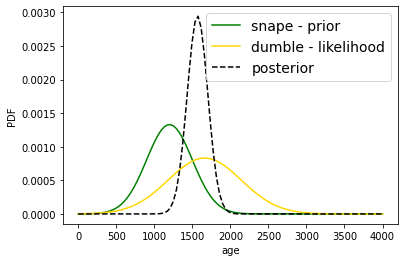

In [46]:
plt.plot(d,norm.pdf(d,prior_mean,prior_std),label='snape - prior',c='green') #likelihood
plt.plot(d,norm.pdf(d,data_mean,data_std),label='dumble - likelihood',c='gold') # prior distribution

plt.plot(d,norm.pdf(d,posterior_mean,posterior_std),"k--",label='posterior') # prior distribution

plt.legend(loc='best',fontsize=14)

plt.xlabel('age')
plt.ylabel('PDF')

***